# MAP inference

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/ed/Bayes_icon.svg" width="300px" height="300px" />

> In the fifth homework you will perform an application of the MAP inference we saw in class. For instance, you will design a Bayesian net-based based classifier, train and test it, and compare it according a benchmark.

> If further questions arise, please use the slack channel, or write me to esjimenezro@iteso.mx.

> **References:**
> - [Solving A Simple Classification Problem with Python — Fruits Lovers’ Edition](https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2)


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/e/ed/Bayes_icon.svg.</p>

___

## Data

The fruits dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. And then the professors at University of Michigan formatted the fruits data slightly and it can be downloaded from [here](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt).

## 1. EDA

Perform some exploratory data analysis over the fruits dataset to get familiarized with the data.

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [8]:
df = pd.read_csv('C:\\Users\\Omar\\Documents\\Modelos Graficos Probabilisticos\\mgpo2020\\Modulo2\\Clase8\\fruit_data_with_colors.txt', sep = '\t')

In [ ]:
df.info()

In [3]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [101]:
#training-test split 
X = df[['mass','width','height','color_score']]
# into y we put our target 
y = df['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state= 764)

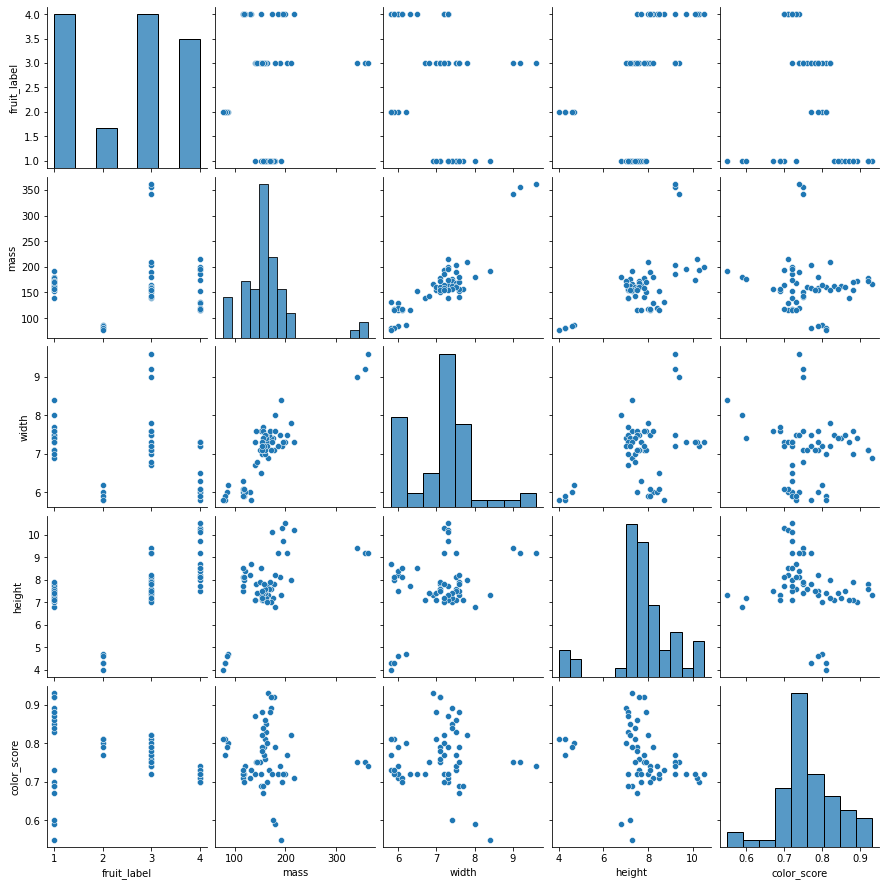

In [117]:
sns.pairplot(df)

## 2. Design a logistic regression classifier

2.1. Split the dataset into train and test. Be sure to suffle the data because it comes ordered.

2.2. Train a logistic regression classifier, using as explainer variables the **mass**, the **width**, the **height**, and the **color_score** for the target variable **fruit_label**

2.3. Obtain the accuracy of your classifier over the test dataset.

In [111]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.75

## 3. Design naïve Bayes classifier

3.1. Use the same train and test sets from the above point.

3.2. Design and train a naïve Bayes classifier, using as explainer variables the **mass**, the **width**, the **height**, and the **color_score** for the target variable **fruit_label**

3.3. Obtain the accuracy of your classifier over the test dataset.

In [77]:
from pgmpy.models import BayesianModel

In [92]:
model = BayesianModel([('fruit_label','mass'),
                       ('fruit_label','width'),
                       ('fruit_label','height'),
                       ('fruit_label','color_score')])

In [103]:
train = pd.DataFrame(X_train).join(y_train).copy()
train.reset_index(drop=True, inplace=True)
train.mass = pd.cut(train.mass, bins=3, labels=np.arange(3), right=False)
train.width = pd.cut(train.width, bins=3, labels=np.arange(3), right=False)
train.height = pd.cut(train.height, bins=3, labels=np.arange(3), right=False)
train.color_score = pd.cut(train.color_score, bins=3, labels=np.arange(3), right=False)

In [104]:
model.fit(train)

In [105]:
model.check_model()

True

In [106]:
test = pd.DataFrame(X_test).copy()
test.mass = pd.cut(test.mass, bins=3, labels=np.arange(3), right=False)
test.width = pd.cut(test.width, bins=3, labels=np.arange(3), right=False)
test.height = pd.cut(test.height, bins=3, labels=np.arange(3), right=False)
test.color_score = pd.cut(test.color_score, bins=3, labels=np.arange(3), right=False)

In [107]:
y_pred = model.predict(test)

100%|██████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1800.90it/s]


In [108]:
(y_pred.values.T == y_test.values.T).sum() / len(y_test)

0.9166666666666666

## Which classifier performs better on the test set?

Bayesian model perform the best for this data set in particular. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>